In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

In [4]:
data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [30]:
data['date'] = pd.to_datetime(data['date'])

In [31]:
data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB


In [33]:
data.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [34]:
data.describe()

,date,active_vehicles,trips
count,354,354.000000,354.000000
mean,2015-01-30 00:00:00,1307.435028,11667.316384
min,2015-01-01 00:00:00,112.000000,629.000000
25%,2015-01-15 00:00:00,296.750000,2408.500000
50%,2015-01-30 00:00:00,1077.000000,9601.000000
75%,2015-02-14 00:00:00,1417.000000,13711.250000
max,2015-02-28 00:00:00,4395.000000,45858.000000
std,NaN,1162.510626,10648.284865


**Quering using sqlite3**

In [35]:
import sqlite3

# Creating an in-memory SQLite database
conn = sqlite3.connect(':memory:')

df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')  

# 3. Push the DataFrame into the SQLite database
df.to_sql('uber_data', conn, index=False, if_exists='replace')


354

Daily Trips Trend

In [36]:
query = """
SELECT 
    date,
    SUM(trips) AS daily_trips,
    SUM(active_vehicles) AS daily_vehicles
FROM uber_data
GROUP BY date
ORDER BY date;
"""
daily_data = pd.read_sql_query(query, conn)


In [37]:
daily_data

,date,daily_trips,daily_vehicles
0,1/1/2015,56437,6885
1,1/10/2015,78484,7346
2,1/11/2015,57026,6571
3,1/12/2015,57646,7364
4,1/13/2015,63499,7559
5,1/14/2015,63329,7849
6,1/15/2015,66729,8080
7,1/16/2015,72480,8273
8,1/17/2015,73363,7527
9,1/18/2015,72473,6863


Base Performance

In [38]:
query = """
SELECT 
    dispatching_base_number AS base,
    SUM(trips) AS total_trips,
    ROUND(SUM(trips)*1.0/SUM(active_vehicles),2) AS avg_trips_per_vehicle
FROM uber_data
GROUP BY dispatching_base_number
ORDER BY total_trips DESC;
"""
base_data = pd.read_sql_query(query, conn)


In [39]:
base_data

,base,total_trips,avg_trips_per_vehicle
0,B02764,1914449,8.81
1,B02617,725025,9.09
2,B02682,662509,9.27
3,B02598,540791,9.22
4,B02765,193670,8.58
5,B02512,93786,7.15


**Trend Visualization**

Daily Trips

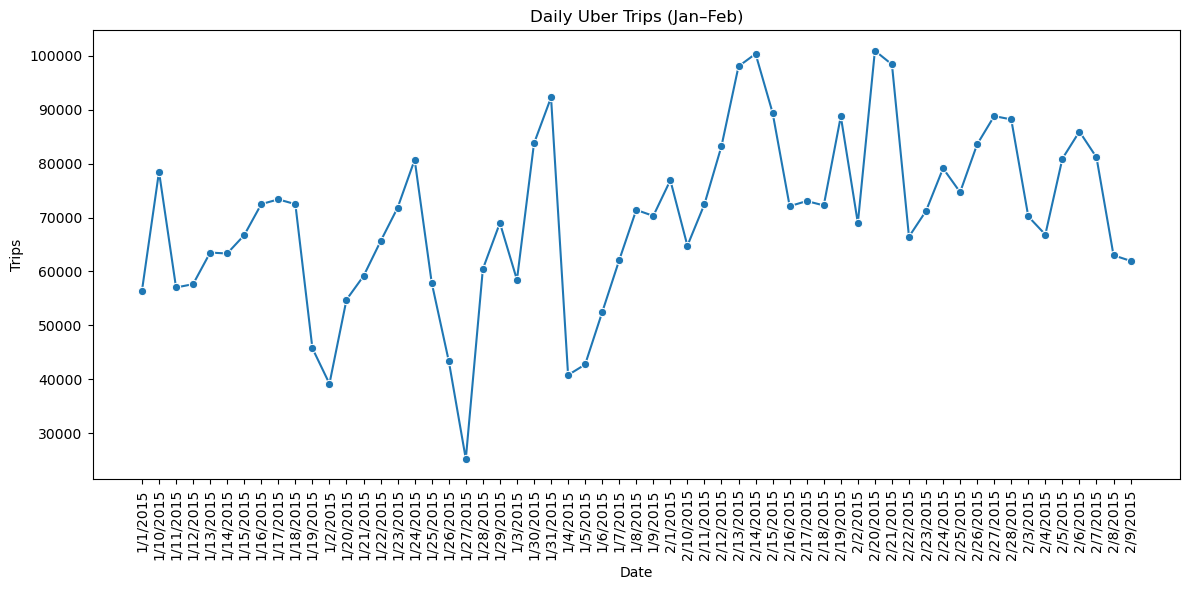

In [40]:
plt.figure(figsize=[12,6])
sns.lineplot(data=daily_data, x="date", y="daily_trips", marker="o")
plt.title("Daily Uber Trips (Jan–Feb)")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Base Total Trips

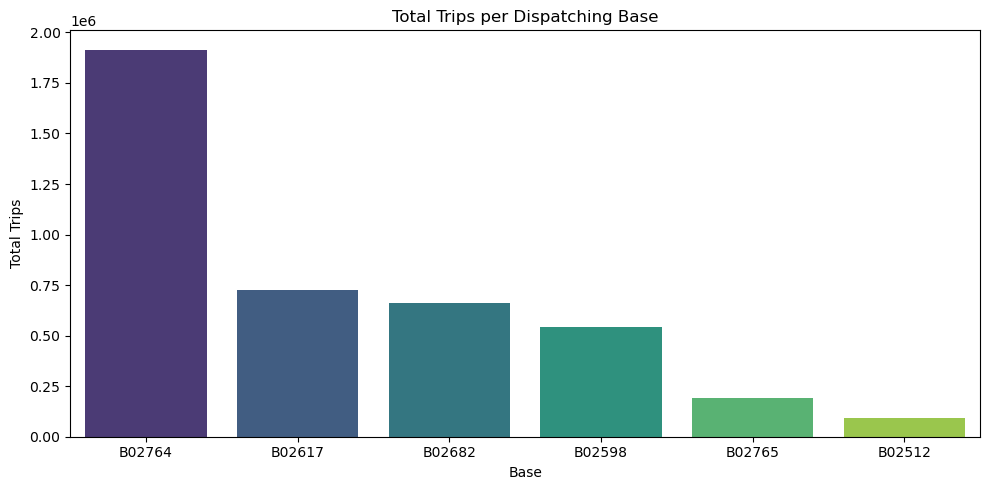

In [41]:
plt.figure(figsize=[10,5])
sns.barplot(data=base_data, x="base", y="total_trips", palette="viridis")
plt.title("Total Trips per Dispatching Base")
plt.xlabel("Base")
plt.ylabel("Total Trips")
plt.tight_layout()
plt.show()


Base Efficiency

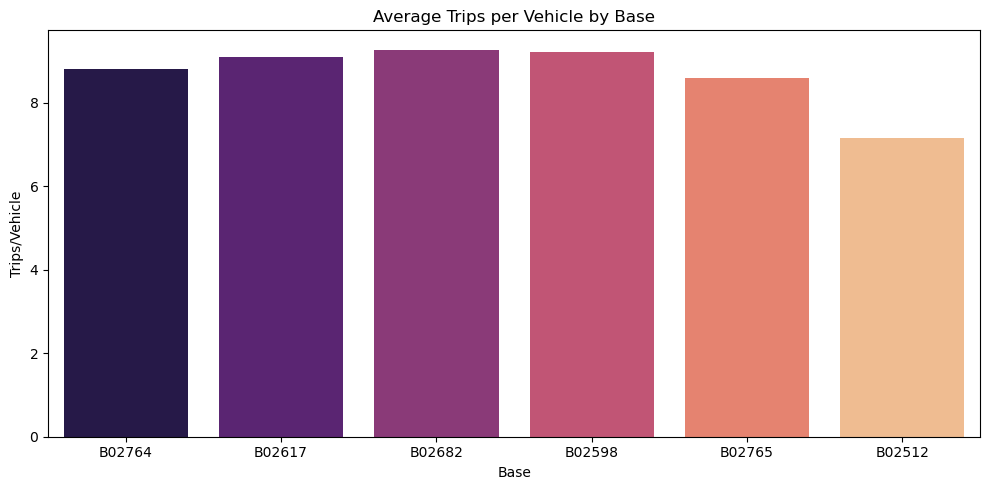

In [42]:
plt.figure(figsize=[10,5])
sns.barplot(data=base_data, x="base", y="avg_trips_per_vehicle", palette="magma")
plt.title("Average Trips per Vehicle by Base")
plt.xlabel("Base")
plt.ylabel("Trips/Vehicle")
plt.tight_layout()
plt.show()


Rolling 7-Day Average

In [43]:
query = """
SELECT 
    date,
    SUM(trips) AS daily_trips,
    ROUND(AVG(SUM(trips)) OVER (
        ORDER BY date ROWS BETWEEN 6 PRECEDING AND CURRENT ROW
    ),2) AS rolling_7day_avg
FROM uber_data
GROUP BY date;
"""
rolling_data = pd.read_sql_query(query, conn)


In [44]:
rolling_data

,date,daily_trips,rolling_7day_avg
0,1/1/2015,56437,56437.00
1,1/10/2015,78484,67460.50
2,1/11/2015,57026,63982.33
3,1/12/2015,57646,62398.25
4,1/13/2015,63499,62618.40
5,1/14/2015,63329,62736.83
6,1/15/2015,66729,63307.14
7,1/16/2015,72480,65599.00
8,1/17/2015,73363,64867.43
9,1/18/2015,72473,67074.14


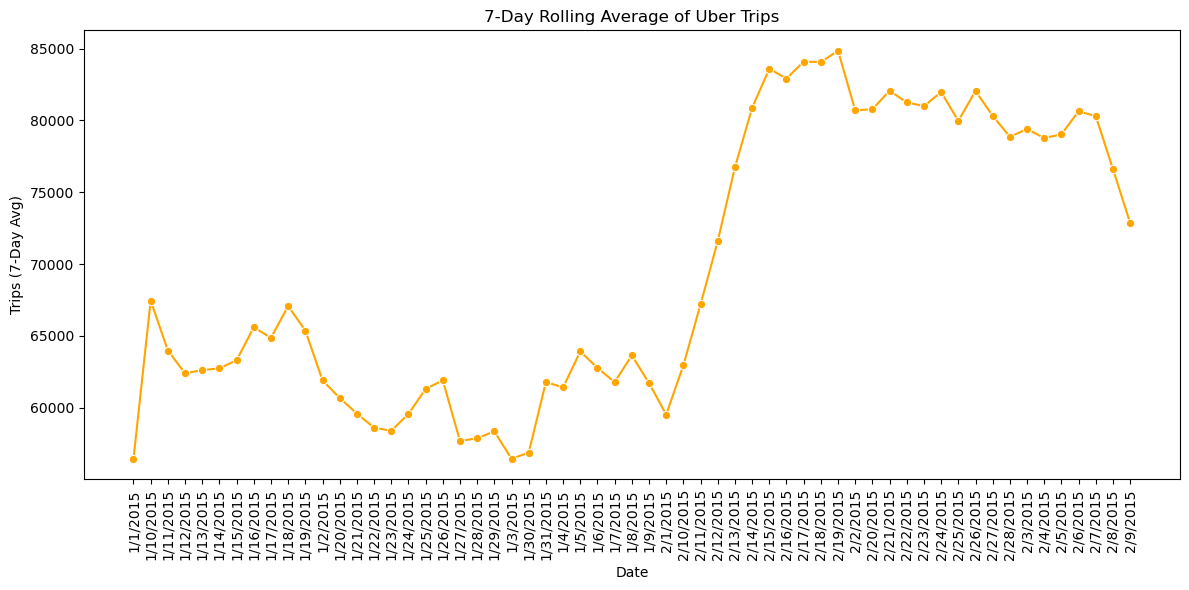

In [46]:
plt.figure(figsize=[12,6])
sns.lineplot(data=rolling_data, x='date', y='rolling_7day_avg', color='orange', marker='o')
plt.title('7-Day Rolling Average of Uber Trips')
plt.xlabel('Date')
plt.ylabel('Trips (7-Day Avg)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Daily Trips and Rolling 7-Day Average

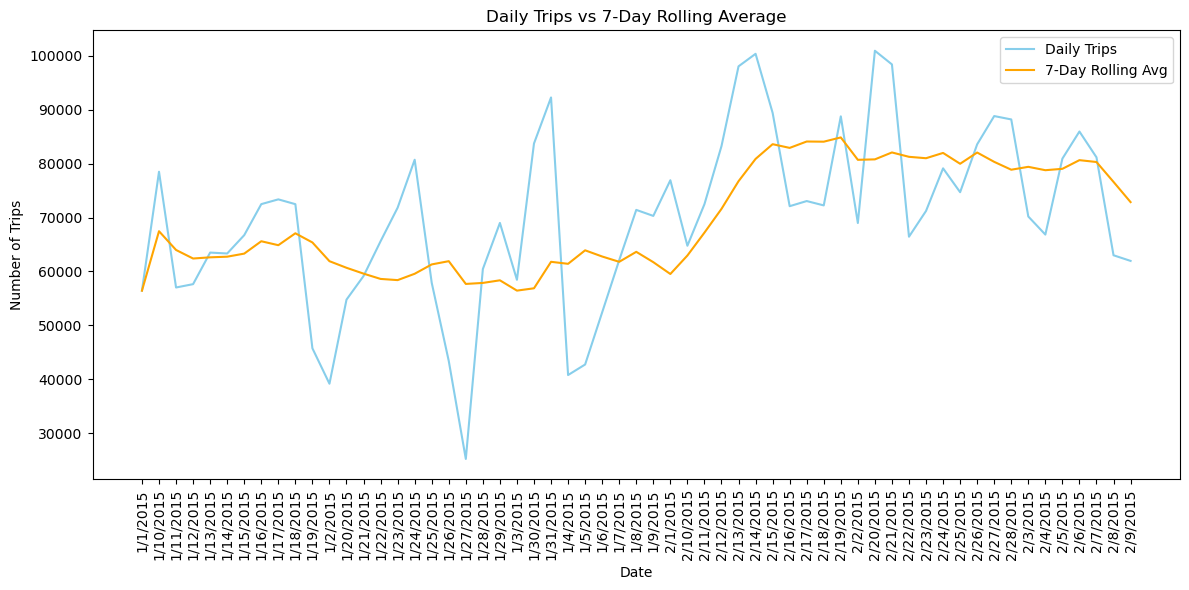

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data=rolling_data, x='date', y='daily_trips', color='skyblue', label='Daily Trips')
sns.lineplot(data=rolling_data, x='date', y='rolling_7day_avg', color='orange', label='7-Day Rolling Avg')
plt.title('Daily Trips vs 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
